In [1]:
import numpy as np
import pandas as pd

__1. Сравните метрики hit_rate@k, precision@k.   
Какую метрику использовать предпочтительно и почему?  
Приведите пример 2-3 задач (опишите, что является клиентом, что товаром), в которой более уместно использовать метрику hit_rate?__


Предпочтительней использовать метрику precision@k т.к. она показывает какой процент из рекоментдованных был продан, в отличии от hit_rate@k который показывает только количество проданных товаров

Пример №1
hit_rate@k уместно использовать при рекомендации фильмов, для того чтобы понять идем ли мы в правильном направлении при рекомендаии фильмов пользователю. В данной задаче П- пользователь, Т - фильм (но если ресурс предлагает новинки, П и Т меняются местами)

Пример №2
Так же метрику hit_rate@k можно использовать в интернет-магазине. П- пользователь, Т - товар (при рекомендации новинок П и Т меняются)

__2. В метрике NDCG@k мы используем логарифм в знаменателе. Как Вы думаете, почему именно логарифм? Какую функцию можно использовать вместо логарифма? Привидите пример метрик/подходов к предобработке данных/функций ошибок в ML, где также в  логарифм.__



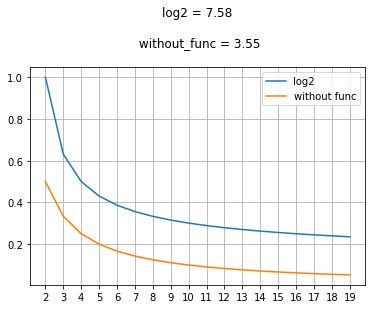

In [30]:
%matplotlib inline 
import matplotlib.pyplot as plt

x = [i for i in range(2, 20)]

logs2 = [1/np.log2(i) for i in x]
without_func = [1/i for i in x]

dcg_log = 1 + sum(logs2)
dcg_without_func = 1 + sum(without_func)

plt.plot(x, logs2, label='log2')
plt.plot(x, without_func, label='without func')
plt.title(f'log2 = {dcg_log:.2f}\n\n without_func = {dcg_without_func:.2f}\n')
plt.xticks(x)
plt.grid()
plt.legend()
plt.show()

Логарифм в знаменателе нужен для того чтобы численно показать важность первых элементов рекомндованных товаров, так как первые рекомендованные товары просматриваются чаще нежели последние

__3. Какие еще метрики (Вы можете вспомнить уже пройденные Вами или посмотреть в интернете) могут использоваться для рекомендательных систем (приведите примеры метрики **и чем являются интеракции**, чтобы она могла быть использована).__

MRR  
RMSE  
PFound

__4. boughted = [1, 3, 5, 7, 9, 11]  
recommended = [2, 5, 7, 4, 11, 9, 8, 10, 12, 3]  
Посчитайте на этих данных pr@8, rec@8, AP@8, NDCG@8, RR@8, ERR@8 (expected reciprocal rank)  
Сначала поссчитайет "руками", а затем подтвердите рассчеты с помощью функций (некоторые были на семинаре, некоторые нужно будут написать самостоятельно)__

**Пример выполнения 4го задания**

MSE на  
$y = [0, 2]$  
$y_{pred} = [1, 2]$

MSE = $0.5*((0 - 1)^2 + (2-2)^2) = 0.5$ 

## Решение

In [3]:
def find_flags_boughted_in_recommended(recommended, boughted, k):
    
    boughted = np.array(boughted)
    recommended = np.array(recommended)[:k]
    
    flags = np.isin(boughted, recommended)
    
    return recommended, boughted, flags

In [4]:
def find_flags_recommended_in_boughted(recommended, boughted, k):
    
    boughted = np.array(boughted)
    recommended = np.array(recommended)[:k]
    
    flags = np.isin(recommended, boughted)
    
    return recommended, boughted, flags

### Precision@k

pr@8 = 4/8 = 1/2 = 0.5

In [5]:
boughted = [1, 3, 5, 7, 9, 11]  
recommended = [2, 5, 7, 4, 11, 9, 8, 10, 12, 3] 

In [6]:
def precision_k(recommended, boughted, k):
    
    recommended, boughted, flag = find_flags_boughted_in_recommended(recommended, boughted, k)
    
    return flag.sum() / len(recommended)

In [7]:
precision_k(recommended, boughted, 8)

0.5

### Recall@8

rec@8 = 4/6 = 2/3

In [8]:
def recall_k(recommended, boughted, k):
    
    recommended, boughted, flag = find_flags_boughted_in_recommended(recommended, boughted, k)
    
    return flag.sum() / len(boughted)

In [9]:
recall_k(recommended, boughted, 8)

0.6666666666666666

### AP@8

[1, 3, 5, 7, 9, 11]  
[2, 5, 7, 4, 11, 9, 8, 10, 12, 3] 

AP@8 = (1/2 + 2/3 + 3/5 + 4/6) / 8 = (73/30) / 8 = 0.30

In [10]:
def ap_k(recommended, boughted, k):
    
    recommended, boughted, flags = find_flags_recommended_in_boughted(recommended, boughted, k)
    
    if flags.sum() == 0:
        return 0
    
    sum_of_precisions = 0
    
    for i in range(k):
        
        if flags[i]:
            
            p_k = precision_k(recommended, boughted, i+1)
            sum_of_precisions += p_k
            
    return sum_of_precisions / len(flags)

In [11]:
ap_k(recommended, boughted, 8)

0.30416666666666664

### NDCG@8

NGCG@8 = DCG / DCG_ideal

DCG@8 = 1/8 * (0 + 1/log2(2) + 1/log2(3) + 0 + 1/log(5) + 1/log2(6)) = 1 + 0,63 + 0,43 + 0,38 = 1/8 * 2,44  
DCG_ideal@8 = 1/8 * (1 + 1/log2(2) + 1/log2(3) + 1/log2(4) + 1/log(5) + 1/log2(6) + 1/log2(7) + 1/log2(8)) = 1/8 * 1 + 0,63 + 0,5 + 0,43 + 0,38 + 0,35 + 0.33 = 4,64  
NGCG@8 = 2,44 / 4,64 = 0,52

In [12]:
def ndcg_k(recommended, boughted, k):
    
    recommended, boughted, flags = find_flags_recommended_in_boughted(recommended, boughted, k)
    
    sum_of = 0
    ideal = 0
    
    for index in range(k):
        
        log2 = np.log2(index + 1)
        
        if index > 0:
            
            if flags[index]:
                sum_of += 1/log2
                
            ideal += 1/log2
        
        else:
            
            if flags[index]:
                sum_of += 1
                
            ideal += 1
        
    return sum_of / ideal

In [13]:
ndcg_k(recommended, boughted, 8)

0.5279127445637272

### RR@8

rr@8 = 1/2 = 0,5

In [19]:
def rr_k(recommended, boughted, k):
    
    recommended, boughted, flags = find_flags_recommended_in_boughted(recommended, boughted, k)
    
    for index, value in enumerate(flags):
        
        rank = index + 1
        
        if value:
        
            return 1/rank
                
    return None

In [20]:
print(rr_k(recommended, boughted, 8))

0.5


### ERR@8

err@8 = 1/2 + 1/3 + 1/5 + 1/6 = (15 + 10 + 6 + 5)/30 = 36/30 = 1,2

In [25]:
def err_k(recommended, boughted, k):
    
    recommended, boughted, flags = find_flags_recommended_in_boughted(recommended, boughted, k)
    
    err = 0
    
    for index, value in enumerate(flags):
        
        if value:
        
            rank = index + 1

            p = 1

            err += 1/rank * p
    
    return err

In [26]:
err_k(recommended, boughted, 8)

1.2